# Классификация кредитных рейтингов

## Словесное описание задачи

На основе сведений о клиенте банка требуется определить его кредитный рейтинг. Предоставленные данные:
- `ID`: уникальный идентификатор записи
- `Customer_ID`: уникальный идентификатор клиента
- `Month`: месяц года, в рамках которого рассматриваются данные
- `Name`: имя клиента
- `Age`: возраст клиента
- `SSN`: номер социального страхования (social security number)
- `Occupation`: род деятельности
- `Annual_Income`: годовой доход
- `Monthly_Inhand_Salary`: ежемесячный доход
- `Num_Bank_Accounts`: число открытых банковских счетов клиента
- `Num_Credit_Card`: число других (взятых в других банках) кредитных карт клиента
- `Interest_Rate`: процентная ставка по кредитной карте
- `Num_of_Loan`: число взятых кредитов
- `Type_of_Loan`: типы взятых кредитов
- `Delay_from_due_date`: среднее число дней, через которые выплачивался просроченный платеж
- `Num_of_Delayed_Payment`: среднее число просроченных платежей
- `Changed_Credit_Limit`: процентное изменение лимита по кредитной карте
- `Num_Credit_Inquiries`: число запросов кредитного рейтинга
- `Credit_Mix`: оценка сбалансированности кредитных обязательств клиента
- `Outstanding_Debt`: остаток долга к уплате
- `Credit_Utilization_Ratio`: доля использованного баланса на кредитной карте
- `Credit_History_Age`: срок ведения кредитной истории
- `Payment_of_Min_Amount`: был ли выплачен только минимальный платёж по кредитной карте
- `Total_EMI_per_month`: ежемесячный платёж
- `Amount_invested_monthly`: сумма денег, ежемесячно инвестируемая
- `Payment_Behaviour`: характер платежей клиента
- `Monthly_Balance`: остаток денег на счетах клиента

## Чтение данных

Установим и импортируем необходимые для работы библиотеки.

In [1]:
%pip install numpy matplotlib pandas scipy scikit-learn seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.model_selection import KFold
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('./train.csv')
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


## Визуализация данных и основные характеристики

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


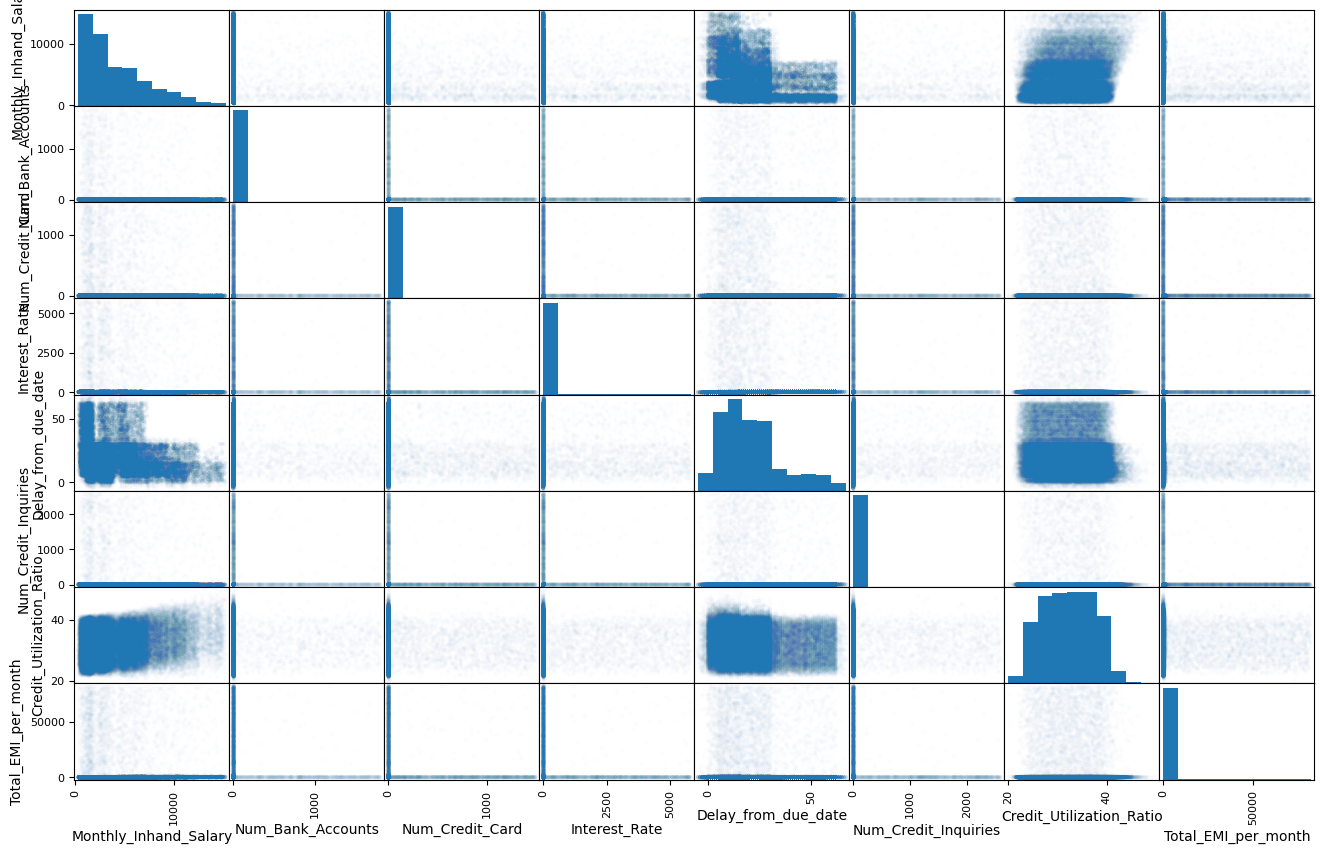

In [5]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.01, figsize=(16, 10))
pass

## Обработка пропущенных значений и выбросов <a class="anchor" id="обработка-пропущенных-значений-и-выбросов"></a>

In [6]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Особенностью рассматриваемого датасета является характер содержащихся в нём данных: информация о всяком клиенте предоставлена по каждому месяцу, с января по август. Это позволяет более разумно заполнять пропущенные значения или исправлять выбросы --- средние значения и моды будут браться не по всей выборке, а по каждому из клиентов.

In [7]:
df_clean = df.copy()

### Вспомогательные функции

In [8]:
def get_group_min_max(df, groupby, column):
    """
    Группирует предоставленный df по groupby, затем находит
    во всякой группе моду, а затем возвращает наименьшее и
    наибольшее значение мод. Используется для оценки истинных
    границ значений по столбцу.
    """

    cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
    x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
    return x[0], y[0]


def age_to_months(string):
    """
    Переводит словесное описание периода времени (лет + месяцев) в
    эквивалентное численное значение месяцев
    """

    if pd.isna(string):
        return pd.NA
    years, months = map(int, [string.split()[0], string.split()[-2]])
    return years * 12 + months

### Нерелевантные столбцы

Из выборки удалены столбцы "ID", "Name" и "SSN", так как они не представляют никакой ценности в расчётах кредитного рейтинга.

In [9]:
df_clean = df_clean.drop(columns=["ID", "Name", "SSN"])

### `Age`

In [10]:
df_clean['Age'] = df_clean['Age'].str.rstrip('_').astype('int64')
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Age')
df_clean['Age'] = df_clean['Age'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Age'] = df_clean.groupby('Customer_ID')['Age'].transform(lambda x: x.fillna(x.mode()[0]))

### `Occupation`

In [11]:
df_clean['Occupation'] = df_clean['Occupation'].replace('_______', pd.NA)
df_clean['Occupation'] = df_clean.groupby('Customer_ID')['Occupation'].transform(lambda x: x.fillna(x.mode()[0]))

### `Annual_Income`

In [12]:
df_clean['Annual_Income'] = df_clean['Annual_Income'].str.rstrip('_').astype('float64')
median = df_clean['Annual_Income'].median()
mad = np.median(np.abs(df_clean['Annual_Income'] - median))
z_scores = 0.6745 * (df_clean['Annual_Income'] - median) / mad
outliers = np.abs(z_scores) > 5
def replace_outliers(x):
    m = x[~outliers[x.index]].mean()
    x.loc[outliers[x.index]] = m
    return x
df_clean['Annual_Income'] = df_clean.groupby('Customer_ID')['Annual_Income'].transform(replace_outliers)

### `Monthly_Inhand_Salary`

In [13]:
df_clean['Monthly_Inhand_Salary'] = df_clean.groupby('Customer_ID')['Monthly_Inhand_Salary'].transform(lambda x: x.fillna(x.mean()))

### `Num_Bank_Accounts`

In [14]:
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Num_Bank_Accounts')
df_clean['Num_Bank_Accounts'] = df_clean['Num_Bank_Accounts'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Num_Bank_Accounts'] = df_clean.groupby('Customer_ID')['Num_Bank_Accounts'].transform(lambda x: x.fillna(x.mode()[0]))

### `Num_Credit_Card`

In [15]:
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Num_Credit_Card')
df_clean['Num_Credit_Card'] = df_clean['Num_Credit_Card'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Num_Credit_Card'] = df_clean.groupby('Customer_ID')['Num_Credit_Card'].transform(lambda x: x.fillna(x.mode()[0]))

### `Interest_Rate`

In [16]:
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Interest_Rate')
df_clean['Interest_Rate'] = df_clean['Interest_Rate'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Interest_Rate'] = df_clean.groupby('Customer_ID')['Interest_Rate'].transform(lambda x: x.fillna(x.mode()[0]))

### `Num_of_Loan`

In [17]:
df_clean['Num_of_Loan'] = df_clean['Num_of_Loan'].str.rstrip('_').astype('int64')
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Num_of_Loan')
df_clean['Num_of_Loan'] = df_clean['Num_of_Loan'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Num_of_Loan'] = df_clean.groupby('Customer_ID')['Num_of_Loan'].transform(lambda x: x.fillna(x.mode()[0]))

### `Num_of_Delayed_Payment`

In [18]:
df_clean['Num_of_Delayed_Payment'] = df_clean['Num_of_Delayed_Payment'].str.rstrip('_')
df_clean['Num_of_Delayed_Payment'] = df_clean.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.mode()[0])).astype('int64')
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Num_of_Delayed_Payment')
df_clean['Num_of_Delayed_Payment'] = df_clean['Num_of_Delayed_Payment'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Num_of_Delayed_Payment'] = df_clean.groupby('Customer_ID')['Num_of_Delayed_Payment'].transform(lambda x: x.fillna(x.mode()[0]))

### `Changed_Credit_Limit`

In [19]:
df_clean['Changed_Credit_Limit'] = pd.to_numeric(df_clean['Changed_Credit_Limit'], errors='coerce')
df_clean['Changed_Credit_Limit'] = df_clean.groupby('Customer_ID')['Changed_Credit_Limit'].transform(lambda x: x.fillna(x.mean()))

### `Num_Credit_Inquiries`

In [20]:
df_clean['Num_Credit_Inquiries'] = df_clean.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.fillna(x.mode()[0])).astype('int64')
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Num_Credit_Inquiries')
df_clean['Num_Credit_Inquiries'] = df_clean['Num_Credit_Inquiries'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Num_Credit_Inquiries'] = df_clean.groupby('Customer_ID')['Num_Credit_Inquiries'].transform(lambda x: x.fillna(x.mode()[0]))

### `Credit_Mix`

In [21]:
df_clean['Credit_Mix'] = df_clean['Credit_Mix'].transform(lambda x: pd.NA if x == '_' else x)
df_clean['Credit_Mix'] = df_clean.groupby('Customer_ID')['Credit_Mix'].transform(lambda x: x.fillna(x.mode()[0]))

### `Outstanding_Debt`

In [22]:
df_clean['Outstanding_Debt'] = df_clean['Outstanding_Debt'].str.rstrip('_').astype('float64')

### `Total_EMI_per_month`

In [23]:
mini, maxi = get_group_min_max(df_clean, 'Customer_ID', 'Total_EMI_per_month')
df_clean['Total_EMI_per_month'] = df_clean['Total_EMI_per_month'].transform(lambda x: x if mini - 1 <= x <= maxi + 1 else pd.NA)
df_clean['Total_EMI_per_month'] = df_clean.groupby('Customer_ID')['Total_EMI_per_month'].transform(lambda x: x.fillna(x.mean()))

### `Amount_invested_monthly`

In [24]:
df_clean['Amount_invested_monthly'] = pd.to_numeric(df_clean['Amount_invested_monthly'], errors='coerce')
df_clean['Amount_invested_monthly'] = df_clean.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.fillna(x.mean()))

### `Monthly_Balance`

In [25]:
df_clean['Monthly_Balance'] = pd.to_numeric(df_clean['Monthly_Balance'], errors='coerce')
df_clean['Monthly_Balance'] = df_clean.groupby('Customer_ID')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

### `Payment_Behaviour`

In [26]:
df_clean['Payment_Behaviour'] = df_clean['Payment_Behaviour'].transform(lambda x: pd.NA if x == '!@9#%8' else x)
df_clean['Payment_Behaviour'] = df_clean.groupby('Customer_ID')['Payment_Behaviour'].transform(lambda x: x.fillna(x.mode()[0]))

### `Credit_History_Age`

In [27]:
df_clean['Credit_History_Age'] = pd.to_numeric(df_clean['Credit_History_Age'].transform(age_to_months), errors='coerce')
df_clean['Credit_History_Age'] = df_clean.groupby('Customer_ID')['Credit_History_Age'].transform(lambda x: x.interpolate('linear', limit_direction='both').round())

### `Type_of_Loan`

In [28]:
df_clean['Type_of_Loan'] = df_clean['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)
df_clean['Type_of_Loan'] = df_clean['Type_of_Loan'].replace([pd.NA], 'no loan')

### Итого

После обработки значений столбец `Customer_ID` может быть убран, так как никакой ценности для решения задачи он не несёт.

In [29]:
df_clean = df_clean.drop(columns=["Customer_ID"])

In [30]:
df_clean.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,26.822620,265.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,February,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.944960,266.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,March,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,28.609352,267.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,April,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,31.377862,268.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,"auto loan,credit-builder loan,personal loan,ho...",...,Good,809.98,24.797347,269.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [31]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,33.311180,10.764783,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4198.468568,3187.369878,303.645417,1626.594167,3096.378333,5961.637500,15204.633333
Num_Bank_Accounts,100000.0,5.368630,2.593748,-1.000000,3.000000,5.000000,7.000000,11.000000
Num_Credit_Card,100000.0,5.533680,2.067126,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.532880,2.446356,0.000000,2.000000,3.000000,5.000000,9.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,13.310540,6.302706,-3.000000,9.000000,14.000000,18.000000,28.000000
Changed_Credit_Limit,100000.0,10.388537,6.784097,-6.490000,5.340000,9.400000,14.850000,36.970000


<Axes: >

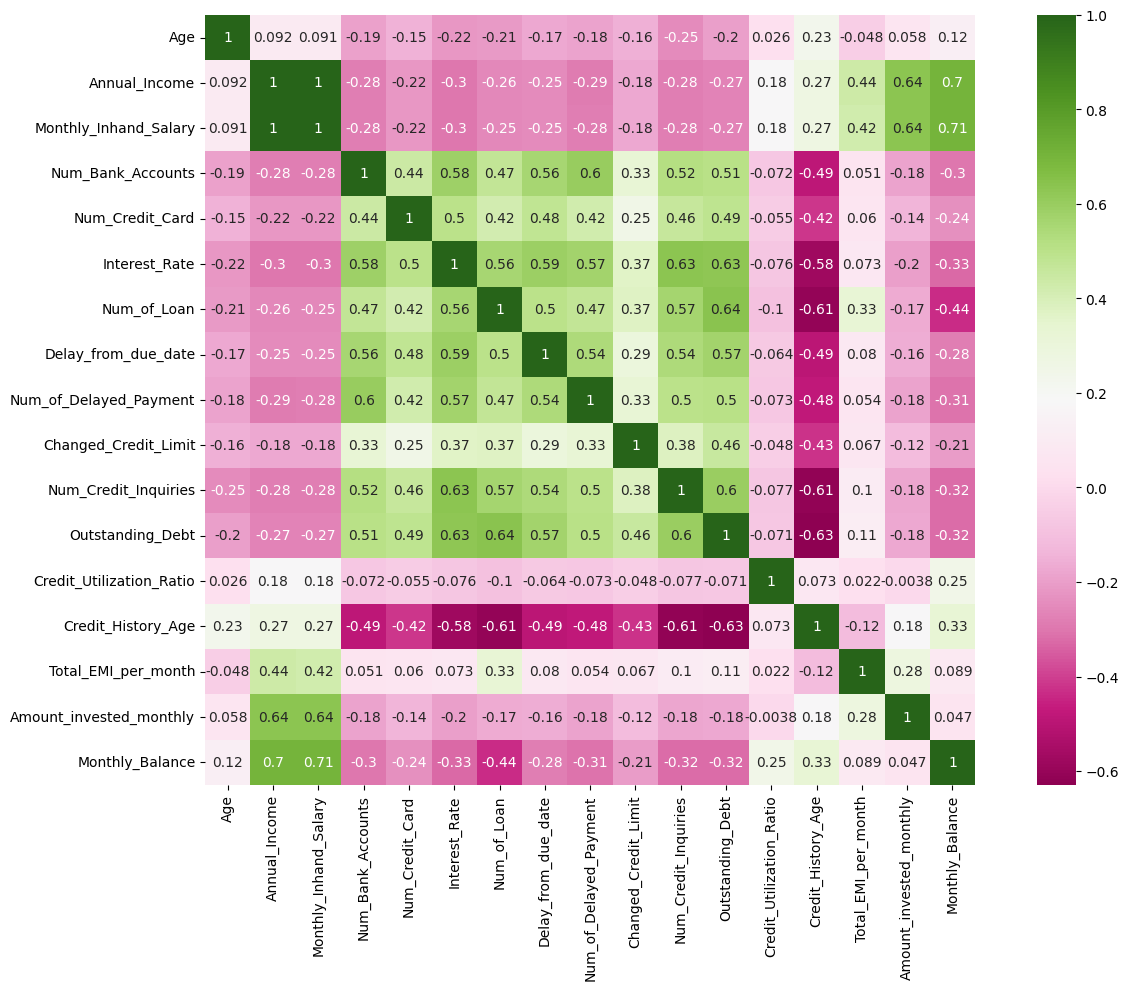

In [32]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_clean.corr(numeric_only=True), square=True, annot=True, cmap="PiYG")

Видно, что переменные `Annual_Income` и `Monthly_Inhand_Salary` коррелированы --- исключим столбец `Monthly_Inhand_Salary`.

In [33]:
df_clean = df_clean.drop(columns=["Monthly_Inhand_Salary"])

## Нормализация

In [34]:
df_numeric = df_clean.copy()

In [35]:
numeric_columns = df_numeric.select_dtypes(include=['int', 'float']).columns.to_list()
for column in numeric_columns:
    df_numeric[column] = (df_numeric[column] - df_numeric[column].mean()) / df_numeric[column].std()

## Обработка категориальных признаков

### `Month`

In [36]:
df_numeric.groupby('Month').size()

Month
April       12500
August      12500
February    12500
January     12500
July        12500
June        12500
March       12500
May         12500
dtype: int64

In [37]:
df_numeric = df_numeric.replace(
    {
        'Month': {
            'January': 0,
            'February': 1,
            'March': 2,
            'April': 3,
            'May': 4,
            'June': 5,
            'July': 6,
            'August': 7,
        }
    }
)
df_numeric['Month'] = (df_numeric['Month'] - df_numeric['Month'].mean()) / df_numeric['Month'].std()

### `Credit_Score`

In [38]:
df_numeric.groupby('Credit_Score').size()

Credit_Score
Good        17828
Poor        28998
Standard    53174
dtype: int64

In [39]:
df_numeric = df_numeric.replace(
    {
        'Credit_Score': {
            'Poor': 0,
            'Standard': 1,
            'Good': 2,
        }
    }
)

### `Occupation`

In [40]:
df_numeric.groupby('Occupation').size()

Occupation
Accountant       6744
Architect        6824
Developer        6720
Doctor           6568
Engineer         6864
Entrepreneur     6648
Journalist       6536
Lawyer           7096
Manager          6432
Mechanic         6776
Media_Manager    6720
Musician         6352
Scientist        6744
Teacher          6672
Writer           6304
dtype: int64

In [41]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
df_numeric['Occupation_enc'] = 0

for train_idx, valid_idx in kf.split(df_numeric):
    train, valid = df_numeric.iloc[train_idx], df_numeric.iloc[valid_idx]
    means = train.groupby('Occupation')['Credit_Score'].mean()
    df_numeric.loc[valid_idx, 'Occupation_enc'] = valid['Occupation'].map(means).fillna(df_numeric['Credit_Score'].mean())

df_numeric['Occupation_enc'] += np.random.normal(0, 0.001, df_numeric['Occupation_enc'].shape)
df_numeric['Occupation'] = df_numeric['Occupation_enc']
df_numeric = df_numeric.drop(columns=['Occupation_enc'])

### `Type_of_Loan`

In [42]:
df_numeric.groupby('Type_of_Loan').size()

Type_of_Loan
auto loan                                                                                                                   1152
auto loan,auto loan                                                                                                          152
auto loan,auto loan,auto loan                                                                                                 24
auto loan,auto loan,auto loan,auto loan,credit-builder loan,credit-builder loan,mortgage loan,personal loan                    8
auto loan,auto loan,auto loan,auto loan,student loan,student loan                                                              8
                                                                                                                            ... 
student loan,student loan,student loan,debt consolidation loan,home equity loan,debt consolidation loan,payday loan            8
student loan,student loan,student loan,home equity loan                             

In [43]:
loan_types = set()
df_numeric['Type_of_Loan'].str.split(',').apply(loan_types.update)

for loan in loan_types:
    df_numeric[loan.replace(' ', '_')] = df_numeric['Type_of_Loan'].transform(lambda x: 1 if loan in x.split(',') else 0)

df_numeric = df_numeric.drop(columns=['Type_of_Loan'])

### `Credit_Mix`

In [44]:
df_numeric.groupby('Credit_Mix').size()

Credit_Mix
Bad         23768
Good        30384
Standard    45848
dtype: int64

In [45]:
df_numeric = df_numeric.replace(
    {
        'Credit_Mix': {
            'Bad': 0,
            'Standard': 1,
            'Good': 2,
        }
    }
)

### `Payment_of_Min_Amount`

In [46]:
df_numeric.groupby('Payment_of_Min_Amount').size()

Payment_of_Min_Amount
NM     12007
No     35667
Yes    52326
dtype: int64

In [47]:
df_numeric = df_numeric.replace(
    {
        'Payment_of_Min_Amount': {
            'No': 0,
            'NM': 1,
            'Yes': 2,
        }
    }
)

### `Payment_Behaviour`

In [48]:
df_numeric.groupby('Payment_Behaviour').size()

Payment_Behaviour
High_spent_Large_value_payments     15348
High_spent_Medium_value_payments    19366
High_spent_Small_value_payments     11980
Low_spent_Large_value_payments      10918
Low_spent_Medium_value_payments     14621
Low_spent_Small_value_payments      27767
dtype: int64

In [49]:
split = df_numeric['Payment_Behaviour'].str.split('_', expand=True)
df_numeric['Payment_Behaviour_Spent'] = split[0]
df_numeric['Payment_Behaviour_Payments'] = split[2]

df_numeric = df_numeric.replace(
    {
        'Payment_Behaviour_Spent': {
            'Low': 0,
            'High': 1,
        },
        'Payment_Behaviour_Payments': {
            'Small': 0,
            'Medium': 1,
            'Large': 2,
        }
    }
)
df_numeric = df_numeric.drop(columns=['Payment_Behaviour'])

## Разбиение на обучающую и тестовую выборки

In [50]:
from sklearn.model_selection import train_test_split

X = df_numeric.drop('Credit_Score', axis=1).to_numpy()
y = df_numeric['Credit_Score'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Обучение

### kNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      7313
           1       0.77      0.80      0.78     13265
           2       0.68      0.58      0.62      4422

    accuracy                           0.75     25000
   macro avg       0.73      0.71      0.72     25000
weighted avg       0.75      0.75      0.75     25000



In [53]:
print(confusion_matrix(y_test, knn_y_pred))

[[ 5593  1468   252]
 [ 1756 10551   958]
 [  203  1667  2552]]


Ошибки на обучающей и тестовой выборках:

In [54]:
print(f'Обучающая: {1 - knn.score(X_train, y_train)}')
print(f'Тестовая: {1 - knn.score(X_test, y_test)}')

Обучающая: 0.18753333333333333
Тестовая: 0.25216000000000005


#### Подбор оптимального `k`

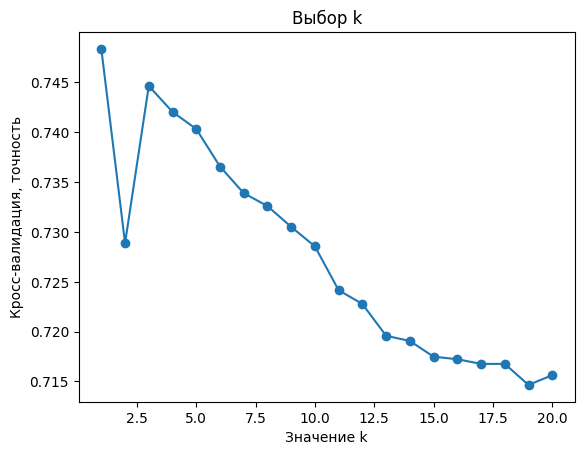

In [55]:
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 21))
cv_scores = [ cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, scoring='accuracy').mean() for k in k_values ]

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Значение k')
plt.ylabel('Кросс-валидация, точность')
plt.title('Выбор k')
plt.show()

Рассмотрим работу при $k = 3$:

In [56]:
opt_knn = KNeighborsClassifier(n_neighbors=3)
opt_knn.fit(X_train, y_train)
opt_knn_y_pred = opt_knn.predict(X_test)

In [57]:
print(classification_report(y_test, opt_knn_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76      7313
           1       0.80      0.78      0.79     13265
           2       0.71      0.67      0.69      4422

    accuracy                           0.76     25000
   macro avg       0.75      0.75      0.75     25000
weighted avg       0.77      0.76      0.76     25000



In [58]:
print(confusion_matrix(y_test, opt_knn_y_pred))

[[ 5773  1385   155]
 [ 1800 10399  1066]
 [  337  1139  2946]]


Ошибки на обучающей и тестовой выборках:

In [59]:
print(f'Обучающая: {1 - opt_knn.score(X_train, y_train)}')
print(f'Тестовая: {1 - opt_knn.score(X_test, y_test)}')

Обучающая: 0.11680000000000001
Тестовая: 0.23528000000000004


### `RandomForestClassifier`

In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
rfc_y_pred = rfc.predict(X_test)

In [61]:
print(classification_report(y_test, rfc_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      7313
           1       0.84      0.82      0.83     13265
           2       0.78      0.78      0.78      4422

    accuracy                           0.82     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.82      0.82      0.82     25000



In [62]:
print(confusion_matrix(y_test, rfc_y_pred))

[[ 6094  1118   101]
 [ 1442 10934   889]
 [   29   934  3459]]


Ошибки на обучающей и тестовой выборках:

In [63]:
print(f'Обучающая: {1 - rfc.score(X_train, y_train)}')
print(f'Тестовая: {1 - rfc.score(X_test, y_test)}')

Обучающая: 0.0
Тестовая: 0.18052


### `GradientBoostingClassifier`

In [64]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_test)

In [65]:
print(classification_report(y_test, gbc_y_pred))
print(confusion_matrix(y_test, gbc_y_pred))

              precision    recall  f1-score   support

           0       0.73      0.65      0.69      7313
           1       0.75      0.75      0.75     13265
           2       0.59      0.70      0.64      4422

    accuracy                           0.71     25000
   macro avg       0.69      0.70      0.69     25000
weighted avg       0.72      0.71      0.71     25000

[[4770 2043  500]
 [1663 9912 1690]
 [  72 1234 3116]]


Ошибки на обучающей и тестовой выборках:

In [66]:
print(f'Обучающая: {1 - gbc.score(X_train, y_train)}')
print(f'Тестовая: {1 - gbc.score(X_test, y_test)}')

Обучающая: 0.27747999999999995
Тестовая: 0.28808


## Выводы

По результатам работы наилучшей точности удалось добиться при использовании `RandomForestClassifier`, со значением $0.82$.

Выбор $k = 3$ в методе kNN даёт баланс точности работы и обобщённости модели, позволяя достичь точности $0.76$.

Метод `GradientBoostingClassifier` показал наихудший результат точности со значением $0.71$.